In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'data/'
state = 'fl_statewide_2020_04_01.csv'
state2 = 'ca_long_beach_2020_04_01.csv'

# Preprocessing whole dataset

In [ ]:
df_full = pd.read_csv(folder + state)
print(df_full.columns)

Reducing the amount of data for experimentation

In [ ]:
cut_file_path = folder + state.split('.')[0] + "_cut.csv"
total_size = df_full.shape[0]
df = df_full.sample(n=int(total_size/100))
print("Full dataset of size {} was reduced to subset of {} elements.".format(total_size, df.shape[0]))
df.to_csv(cut_file_path, index = False)

# Preprocessing data

In [3]:
# df = pd.read_csv(cut_file_path)
df =  pd.read_csv(folder + state)
print("Dataset is composed of {} stops. Columns are: \n".format(df.shape[0]))
for col in df.columns:
    if df.dtypes[col] != np.float64:
        val = df[col].unique()
        if len(val) > 20:
            print('{} \t\t: too much different values'.format(col))
        else:
            print('{} \t\t: values are: {}'.format(col if len(col)>15 else col + "\t\t", val))

Dataset is composed of 7297538 stops. Columns are: 

raw_row_number 		: too much different values
date 		: too much different values
time 		: too much different values
location 		: too much different values
county_name 		: too much different values
subject_race		 		: values are: [nan 'white' 'black' 'hispanic' 'asian/pacific islander' 'other' 'unknown']
subject_sex		 		: values are: ['female' 'male' nan]
officer_id_hash 		: too much different values
officer_race		 		: values are: [nan 'black' 'white' 'hispanic' 'unknown' 'asian/pacific islander' 'other']
officer_sex		 		: values are: [nan 'male' 'female']
department_name		 		: values are: ['FLORIDA HIGHWAY PATROL' 'FLORIDA HIGHWAY PATROL - TROOP K'
 'FLORIDA HIGHWAY PATROL  MOTORS SQ' 'FLORIDA DEPARTMENT OF AGRICULTURE'
 nan]
unit 		: too much different values
type		 		: values are: ['vehicular']
violation 		: too much different values
arrest_made		 		: values are: [nan False True]
citation_issued		 		: values are: [True False nan]
war

In [4]:
df_cleaned = df.rename(columns={'officer_years_of_service': 'officer_yos'})

columns_unused = ['officer_id_hash', 'vehicle_registration_state', 'type']
columns_reasons = ['reason_for_stop', 'reason_for_search', 'notes', 'violation', 'search_basis']
columns_raw = ['raw_EnforcementAction', 'raw_SearchType', 'raw_Ethnicity', 'raw_row_number_new', 'raw_Race', 'raw_row_number_old', 'raw_row_number']
columns_geography = ['location', 'date','time', 'department_name', 'unit']

df_cleaned.drop(columns=columns_unused + columns_reasons + columns_raw + columns_geography, inplace=True)

important_features = ['subject_race', 'officer_race', 'search_conducted']
important_features = ['subject_age', 'subject_race','subject_sex', 'officer_age', 'officer_race', 'officer_sex', 'officer_yos', 'search_conducted', 'arrest_made']
df_cleaned.dropna(inplace=True, subset=important_features)
print('Cleaned subset is composed of {} datapoints'.format(df_cleaned.shape[0]))
# df_cleaned.head(50)

Cleaned subset is composed of 2879765 datapoints


# Preprocess to compare search rates

Calculate search rates for each officer race and each subject race across each county

In [5]:
df_ = df_cleaned

# overview of all the data / global search rate
number_stops= df_['search_conducted'].shape[0]
number_search_conducted = df_[df_['search_conducted'] == True].shape[0]
print('Data contains {} stops and {} of them ({}%) resulted in searches.'.format(number_stops, number_search_conducted, 100 * float(number_search_conducted)/number_stops))

# calculate search rate in percent
df_['search_rate'] = df_['search_conducted']
df_ = df_.astype({'search_rate': float})

df_['count'] = 1

# group by officer race, subject race and county name
df_all = df_.groupby(['officer_race','subject_race','county_name']).agg({'search_rate': 'mean', 'count':'count'})
df_all.head(50)

Data contains 2879765 stops and 18966 of them (0.6585954062223828%) resulted in searches.


search_rate  \
officer_race           subject_race           county_name                        
asian/pacific islander asian/pacific islander Broward County          0.000000   
                                              Escambia County         0.000000   
                                              Gadsden County          0.000000   
                                              Hillsborough County     0.000000   
                                              Jefferson County        0.000000   
                                              Leon County             0.000000   
                                              Madison County          0.000000   
                                              Manatee County          0.000000   
                                              Okaloosa County         0.000000   
                                              Orange County           0.000000   
                                              Osceola County          0.000000   
                                              Palm Beach County       0.016000   
                                              Polk County             0.000000   
                                              Santa Rosa County       0.000000   
                                              Walton County           0.000000   
                       black                  Broward County          0.000000   
                                              Columbia County         0.000000   
                                              Escambia County         0.000000   
                                              Gadsden County          0.000000   
                                              Hernando County         0.000000   
                                              Hillsborough County     0.000000   
                                              Jefferson County        0.000000   
                                              Leon County             0.000000   
                                              Liberty County          0.000000   
                                              Madison County          0.000000   
                                              Manatee County          0.000000   
                                              Miami-Dade County       0.000000   
                                              Okaloosa County         0.003436   
                                              Orange County           0.000000   
                                              Osceola County          0.000000   
                                              Palm Beach County       0.007264   
                                              Pinellas County         0.000000   
                                              Polk County             0.002915   
                                              Santa Rosa County       0.000000   
                                              Seminole County         0.000000   
                                              Suwannee County         0.000000   
                                              Taylor County           0.000000   
                                              Wakulla County          0.000000   
                                              Walton County           0.000000   
                       hispanic               Broward County          0.000000   
                                              Columbia County         0.000000   
                                              Escambia County         0.000000   
                                              Gadsden County          0.000000   
                                              Hillsborough County     0.000000   
                                              Jefferson County        0.000000   
                                              Leon County             0.000000   
                                              Liberty County          0.000000   
                                              Mad

In [6]:
officer_race = ['white', 'black', 'hispanic']
df_officers = {}

for race in officer_race:
    df_officers[race] = df_all.loc[race]


# df_merged = pd.merge(df_white, df_black, left_index=True, right_index=True, suffixes=['_white_police', '_black_police'])
df_officers['white'].head()

search_rate  count
subject_race           county_name                        
asian/pacific islander Alachua County      0.010638    564
                       Baker County        0.000000    203
                       Bay County          0.000000    434
                       Bradford County     0.000000     17
                       Brevard County      0.004274    468

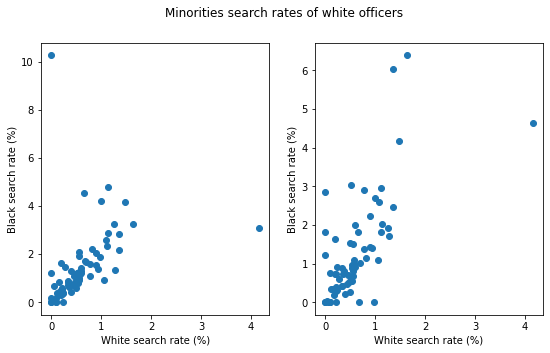

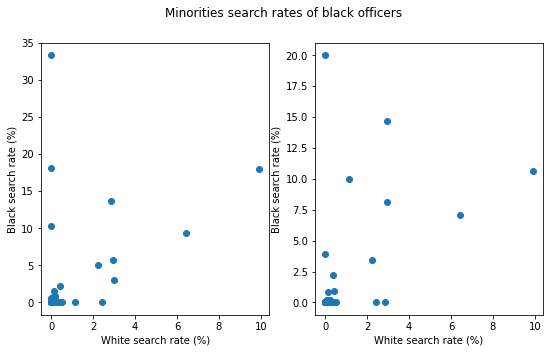

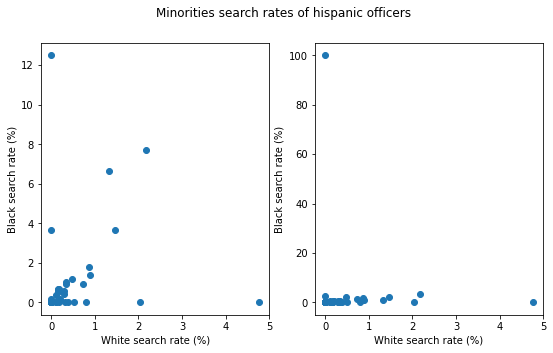

In [23]:
def plot_officer_race(data, race):
    data_ = data[race]
    df_white_sub, df_black_sub, df_hispanic = data_.loc['white'], data_.loc['black'], data_.loc['hispanic'] #separate data
    df_white_sub.reset_index(inplace=True), df_black_sub.reset_index(inplace=True), df_hispanic.reset_index(inplace=True) #reset index
    df_merged = pd.merge(df_white_sub, df_black_sub, on='county_name', suffixes=['', '_black'])
    df_merged = pd.merge(df_merged, df_hispanic, on='county_name', suffixes=['_white', '_hispanic'])
    fig, ax_arr = plt.subplots(1, 2) # 2 graphs
    fig.set_size_inches(9,5) # fig size

    fig.suptitle("Minorities search rates of {} officers".format(race))

    ax_arr[0].scatter(df_merged['search_rate_white']*100, df_merged['search_rate_black']*100)
    ax_arr[0].set_xlabel("White search rate (%)")
    ax_arr[0].set_ylabel("Black search rate (%)")

    ax_arr[1].scatter(df_merged['search_rate_white']*100, df_merged['search_rate_hispanic']*100)
    ax_arr[1].set_xlabel("White search rate (%)")
    ax_arr[1].set_ylabel("Black search rate (%)")
    

for race in officer_race:
    plot_officer_race(df_officers, race)
